## Import libraries

In [2]:
# import libraries
import data_handler as dh
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from joblib import dump
import os
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

## Get data

In [3]:
data_path = 'C:\practice_september\Personalexercises_september\Chapter2\weekend challenge\heart.csv'
x_train, x_test, y_train, y_test = dh.get_data(data_path)

## Process Data

In [4]:
#Normalize data
scalar = StandardScaler()
scalar_x_train = scalar.fit_transform(x_train)
scalar_x_test = scalar.transform(x_test)

## Train Model

In [5]:
#fit svm
svm_clf_best = svm.SVC()
svm_clf_best.fit(scalar_x_train,y_train)

#check initial accuracy
acc_train = svm_clf_best.score(scalar_x_train,y_train)
acc_test = svm_clf_best.score(scalar_x_test,y_test)
y_pred = svm_clf_best.predict(scalar_x_test)
print(" ")
print("Train Accuracy: {},\tTest Accuracy: {}".format(acc_train,acc_test))
print("F1 Score: {},\tPrecision  Score: {},\tRecall Score: {}".format( f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred) ) )

conf=ConfusionMatrixDisplay.from_estimator(svm_clf_best, scalar_x_test, y_test);#, display_labels=labels
conf_mat = conf.confusion_matrix

 
Train Accuracy: 0.8925619834710744,	Test Accuracy: 0.8688524590163934
F1 Score: 0.8888888888888888,	Precision  Score: 0.8421052631578947,	Recall Score: 0.9411764705882353


AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

## Grid Search on svm

In [ ]:
params_more = {'kernel':['linear','rbf','poly','sigmoid'],\
    'C':np.arange(2**(-5),2**5,2),\
        'decision_function_shape':['ovr','ovo'],\
            'gamma':np.arange(2**(-5),2**5,2)}

svc = svm.SVC()
grid_clf = GridSearchCV(svc, params_more, cv=10)
grid_clf.fit(scalar_x_train, y_train)

svm_model = grid_clf.best_estimator_
print("Best estimator found by grid search: "+str(svm_model))

print('\nkernel:\t'+svm_model.kernel+'\nC:\t'+str(svm_model.C)\
    +'\nDecision Function Shape:\t'+svm_model.decision_function_shape\
        +'\nGamma:\t'+str(svm_model.gamma))
print("\nScore:\t"+str(grid_clf.best_score_))

y_pred = svm_model.predict(scalar_x_test)
print(" ")
print("Train Accuracy: {},\tTest Accuracy: {}".format(acc_train,acc_test))
print("F1 Score: {},\tPrecision  Score: {},\tRecall Score: {}".format( f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred) ) )

Best estimator found by grid search: SVC(C=0.03125, gamma=0.03125, kernel='linear')

kernel:	linear
C:	0.03125
Decision Function Shape:	ovr
Gamma:	0.03125

Score:	0.8225


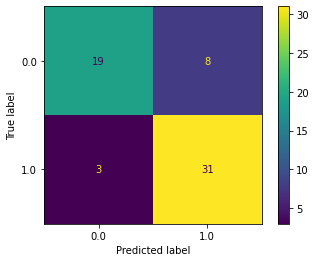

In [ ]:
conf=ConfusionMatrixDisplay.from_estimator(grid_clf, scalar_x_test, y_test);#, display_labels=labels
conf_mat = conf.confusion_matrix

## Data Argmentation

0.08264462809917356
0.8931297709923665 0.8688524590163934
 
Train Accuracy: 0.8931297709923665,	Test Accuracy: 0.8688524590163934
F1 Score: 0.8888888888888888,	Precision  Score: 0.8421052631578947,	Recall Score: 0.9411764705882353


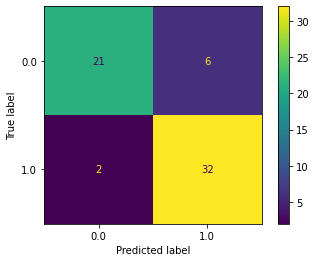

In [ ]:
#Over Sampling

sm = SMOTE(random_state=12)

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
print( (x_train_res.shape[0] - x_train.shape[0]) / x_train.shape[0] )

#Normalize data
scalar = StandardScaler()
scalar_x_train = scalar.fit_transform(x_train_res)
scalar_x_test = scalar.transform(x_test)

#fit svm
svm_clf = svm.SVC()
svm_clf.fit(scalar_x_train,y_train_res)

#check initial accuracy
acc_train = svm_clf.score(scalar_x_train,y_train_res)
acc_test = svm_clf.score(scalar_x_test,y_test)
print(acc_train,acc_test)

y_pred = svm_clf.predict(scalar_x_test)
print(" ")
print("Train Accuracy: {},\tTest Accuracy: {}".format(acc_train,acc_test))
print("F1 Score: {},\tPrecision  Score: {},\tRecall Score: {}".format( f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred) ) )

conf=ConfusionMatrixDisplay.from_estimator(svm_clf, scalar_x_test, y_test);#, display_labels=labels
conf_mat = conf.confusion_matrix
#SMOTEENN


In [ ]:


sm = SMOTEENN(random_state=12)

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

#Normalize data
scalar = StandardScaler()
scalar_x_train = scalar.fit_transform(x_train_res)
scalar_x_test = scalar.transform(x_test)

#fit svm
svm_clf = svm.SVC()
svm_clf.fit(scalar_x_train,y_train_res)

#check initial accuracy
acc_train = svm_clf.score(scalar_x_train,y_train_res)
acc_test = svm_clf.score(scalar_x_test,y_test)
print(acc_train,acc_test)

y_pred = svm_clf.predict(scalar_x_test)
print(" ")
print("Train Accuracy: {},\tTest Accuracy: {}".format(acc_train,acc_test))
print("F1 Score: {},\tPrecision  Score: {},\tRecall Score: {}".format( f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred) ) )

conf=ConfusionMatrixDisplay.from_estimator(svm_clf, scalar_x_test, y_test);#, display_labels=labels
conf_mat = conf.confusion_matrix


NameError: name 'SMOTEENN' is not defined

0.9442148760330579 0.8852459016393442
 
Train Accuracy: 0.9442148760330579,	Test Accuracy: 0.8852459016393442
F1 Score: 0.8985507246376812,	Precision  Score: 0.8857142857142857,	Recall Score: 0.9117647058823529


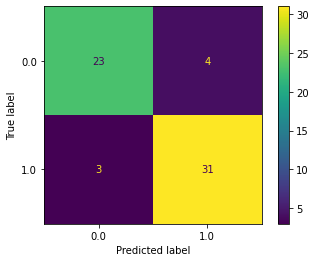

In [ ]:
#Under Sampling

random_train = np.random.normal(0,.1,size=x_train.shape) +  x_train
x_train_res = np.concatenate([x_train,random_train],axis=0)
y_train_res = np.concatenate([y_train,y_train],axis=0)


#Normalize data
scalar = StandardScaler()
scalar_x_train = scalar.fit_transform(x_train_res)
scalar_x_test = scalar.transform(x_test)

#fit svm
svm_clf = svm.SVC()
svm_clf.fit(scalar_x_train,y_train_res)

#check initial accuracy
acc_train = svm_clf.score(scalar_x_train,y_train_res)
acc_test = svm_clf.score(scalar_x_test,y_test)
print(acc_train,acc_test)

y_pred = svm_clf.predict(scalar_x_test)
print(" ")
print("Train Accuracy: {},\tTest Accuracy: {}".format(acc_train,acc_test))
print("F1 Score: {},\tPrecision  Score: {},\tRecall Score: {}".format( f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred) ) )

conf=ConfusionMatrixDisplay.from_estimator(svm_clf, scalar_x_test, y_test);#, display_labels=labels
conf_mat = conf.confusion_matrix


## Gradient Boost

1.0 0.8032786885245902


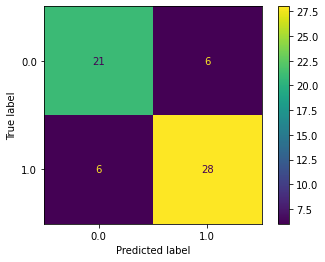

In [ ]:
#fit gdb
gdb_clf = GradientBoostingClassifier()
gdb_clf.fit(x_train,y_train)

#check initial accuracy
acc_train = gdb_clf.score(x_train,y_train)
acc_test = gdb_clf.score(x_test,y_test)
print(acc_train,acc_test)

conf=ConfusionMatrixDisplay.from_estimator(gdb_clf, x_test, y_test);#, display_labels=labels
conf_mat = conf.confusion_matrix

1.0 0.8852459016393442


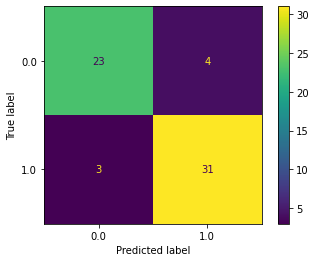

In [ ]:
#fit gdb
gdb_clf = RandomForestClassifier()
gdb_clf.fit(x_train,y_train)

#check initial accuracy
acc_train = gdb_clf.score(x_train,y_train)
acc_test = gdb_clf.score(x_test,y_test)
print(acc_train,acc_test)

conf=ConfusionMatrixDisplay.from_estimator(gdb_clf, x_test, y_test);#, display_labels=labels
conf_mat = conf.confusion_matrix

1.0 0.8360655737704918


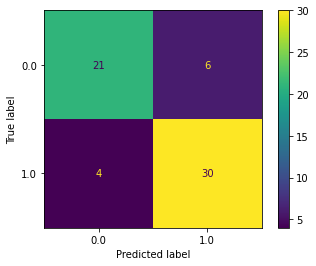

In [ ]:
sm = SMOTE(random_state=12)
newx_col = x_train[:,3]-x_train[:,4]
newx_test_col = x_test[:,3]-x_test[:,4]

new_x_test = np.concatenate((x_test,newx_test_col.reshape(-1,1)),axis=1)

nx_train = np.concatenate((x_train,newx_col.reshape(-1,1)),axis=1)

x_train_res, y_train_res = sm.fit_resample(nx_train, y_train)

#fit gdb
gdb_clf = RandomForestClassifier()
gdb_clf.fit(x_train_res,y_train_res)

#check initial accuracy
acc_train = gdb_clf.score(x_train_res,y_train_res)
acc_test = gdb_clf.score(new_x_test,y_test)
print(acc_train,acc_test)

conf=ConfusionMatrixDisplay.from_estimator(gdb_clf, new_x_test, y_test);#, display_labels=labels
conf_mat = conf.confusion_matrix

In [ ]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


1.0 0.7049180327868853


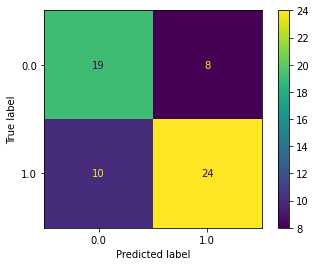

In [ ]:

#fit gdb
gdb_clf = RandomForestClassifier()
gdb_clf.fit(x_train_pca,y_train)

#check initial accuracy
acc_train = gdb_clf.score(x_train_pca,y_train)
acc_test = gdb_clf.score(x_test_pca,y_test)
print(acc_train,acc_test)

conf=ConfusionMatrixDisplay.from_estimator(gdb_clf, x_test_pca, y_test);#, display_labels=labels
conf_mat = conf.confusion_matrix

## Retrain Model

In [ ]:
model = GradientBoostingRegressor(random_state=0)
gs = GridSearchCV(model, param_grid, cv=10)
gs = gs.fit(x_train, y_train)

## Check Accuracy

## Choose and Save Best model

In [ ]:
#save model
path = './data/best_model.joblib'
try:
    os.remove(path)
except:
    pass
dump(svm_clf_best, path)


['./data/best_model.joblib']